# Importing Libraries and Datasets

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv('Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

# Initial Analysis and Creating The Dependent And Independent Variables

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x = df[["CreditScore", 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df['Exited']


<Axes: xlabel='Exited', ylabel='count'>

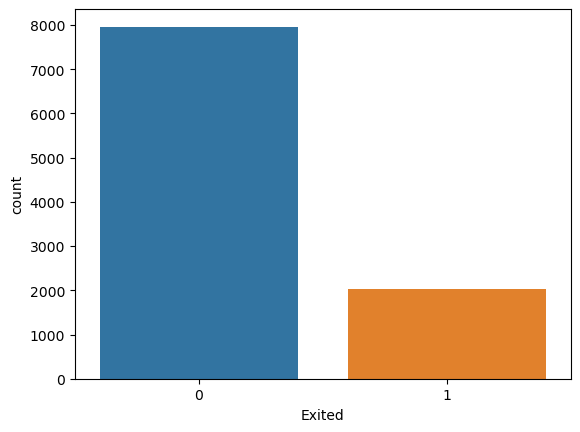

In [7]:
sns.countplot(x = y)

In [8]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Scaling the Dependent Variables using Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Splitting Data into Training And Testing Set

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y , test_size= 0.25)
x_scaled.shape, x_train.shape, x_test.shape

((10000, 8), (7500, 8), (2500, 8))

# Creating And Training the neural network based model in sklearn library

In [13]:
from sklearn.neural_network import MLPClassifier


In [14]:
ann = MLPClassifier(hidden_layer_sizes = (100, 100, 100),
                    random_state = 0,
                    max_iter = 100,
                    activation = 'relu')

In [15]:
ann.fit(x_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [16]:
y_pred = ann.predict(x_test)

In [17]:
y_test.value_counts()

Exited
0    2009
1     491
Name: count, dtype: int64

# Analysis of model Accuracy

In [18]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

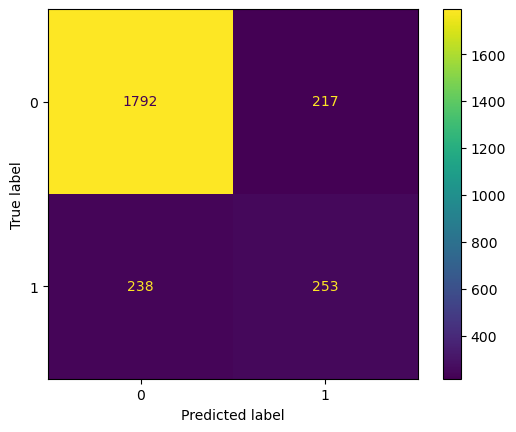

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [20]:
accuracy_score(y_test, y_pred)

0.818

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2009
           1       0.54      0.52      0.53       491

    accuracy                           0.82      2500
   macro avg       0.71      0.70      0.71      2500
weighted avg       0.82      0.82      0.82      2500

